<a href="https://colab.research.google.com/github/mamun216/portfolio-projects/blob/master/NYC_Airbnb_data_analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) & price prediction on NYC Airbnb data with python

# Problem overview
Airbnb is an online marketplace that connects people who want to rent out their homes with people looking for accommodations in that locale. NYC is the most populous city in the United States, and one of the most popular tourism and business places globally.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Nowadays, Airbnb became one of a kind service that is used by the whole world. 

Data analysts become a crucial factor for the company that provided millions of listings through Airbnb. These listings generate a lot of data that can be analyzed and used for security, business decisions, understanding of customers and providers behavior on the platform, implementing innovative additional services, guiding marketing initiatives, and much more.
My task is to analyse the data and find out the price prediction best accurate based on existing data.

https://www.kaggle.com/duygut/airbnb-nyc-price-prediction/data?select=AB_NYC_2019.csv# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["figure.figsize"] = (12,8)

# Load The Data
The dataset we use is “New York Airbnb Open Data” from Kaggle. Using Pandas Library, we’ll load the CSV file. Named it with nyc_df for the dataset. For easy work in colab I loaded raw data from github sources link.

In [3]:
nyc_df = pd.read_csv("https://raw.githubusercontent.com/dwiknrd/medium-code/master/ny-airbnb/AB_NYC_2019.csv")
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


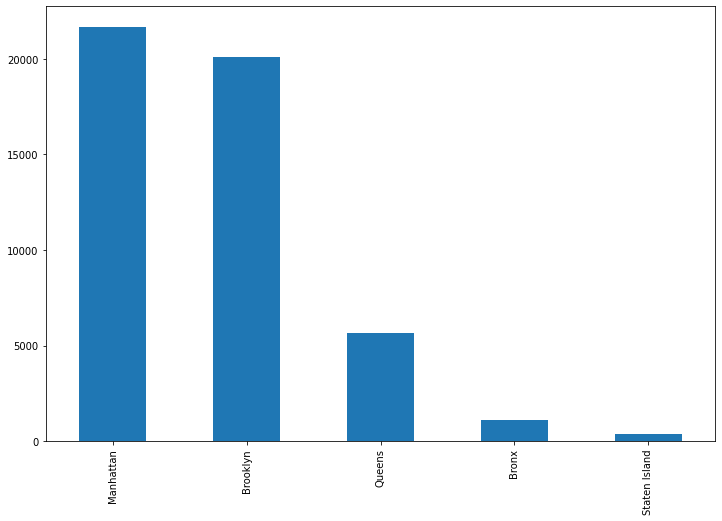

In [4]:
nyc_df.neighbourhood_group.value_counts().plot(kind = "bar");

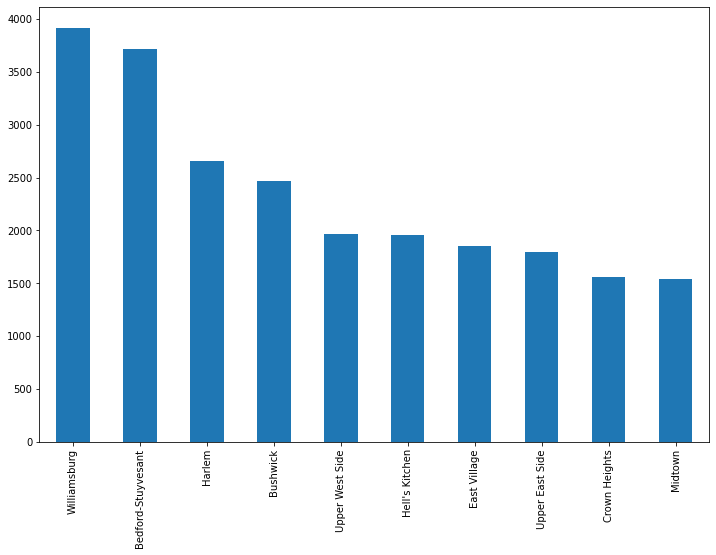

In [5]:
nyc_df.neighbourhood.value_counts().nlargest(10).plot(kind = "bar");

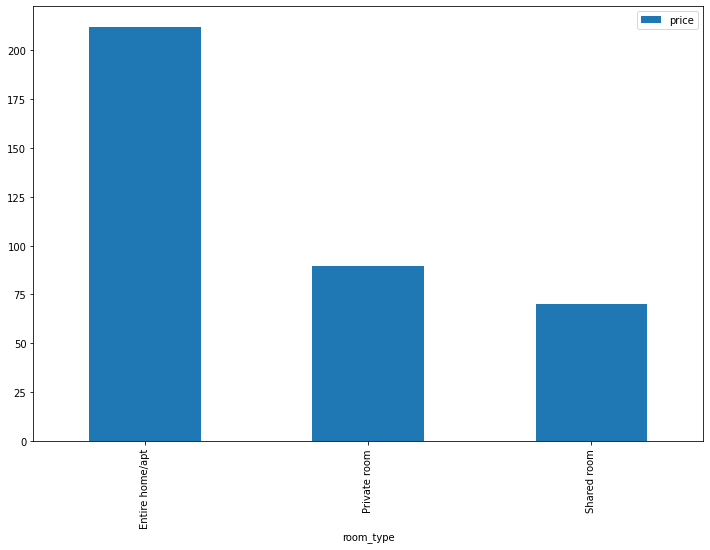

In [6]:
nyc_df[["room_type","price"]].groupby("room_type").mean().plot(kind = "bar");

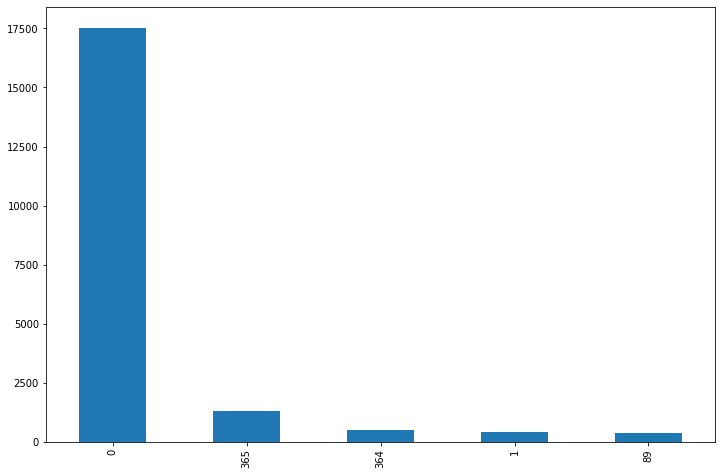

In [7]:
nyc_df.availability_365.value_counts().head().plot(kind = "bar");

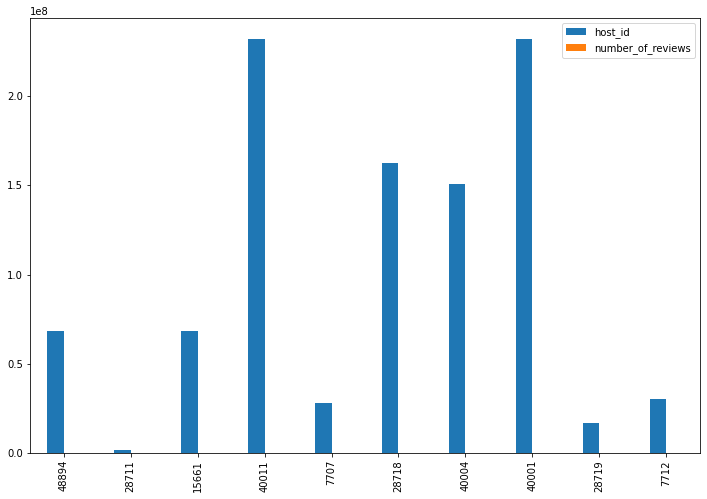

In [8]:
# Which host have highest review?
nyc_df[["host_id", "number_of_reviews"]].sort_values(by="number_of_reviews").head(10).plot(kind ="bar");

# Data Profiling and Cleansing
Let’s get a summary of the dataset we have.

In [9]:
# summary
print("Rows     :",nyc_df.shape[0])
print("Columns  :",nyc_df.shape[1])
print("\nFeatures :\n",nyc_df.columns.tolist())
print("\nMissing Value    :",nyc_df.isnull().sum().sum())
print("\nColumns with missing value:\n",nyc_df.isnull().sum())


Rows     : 48895
Columns  : 16

Features :
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing Value    : 20141

Columns with missing value:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype

We have 4 columns contain a missing value. Now, we drop unnecessary columns such as id, name, host_name, last_review.

In [10]:
#drop unnecessary columns
nyc_df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
print(nyc_df.head())

   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2  

Replacing all NaN values in “review_per_month_ with 0

In [11]:
#replacing all NaN values in 'reviews_per_month' with 0
nyc_df.reviews_per_month.fillna(0, inplace=True)
print(nyc_df.isnull().sum())

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


# Exploration Data and Visualizing
Now time to explore our data and visualize it to recognize the relationship between the features.

## Neighbourhood Group

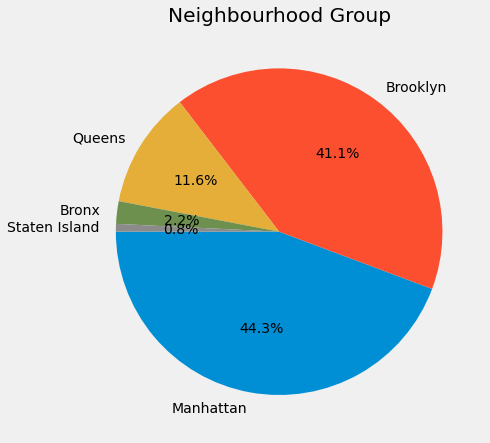

In [12]:
#Neighbourhood Group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(nyc_df.neighbourhood_group.value_counts(), labels=nyc_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. 

We also know that from this map of Neighborhood Group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


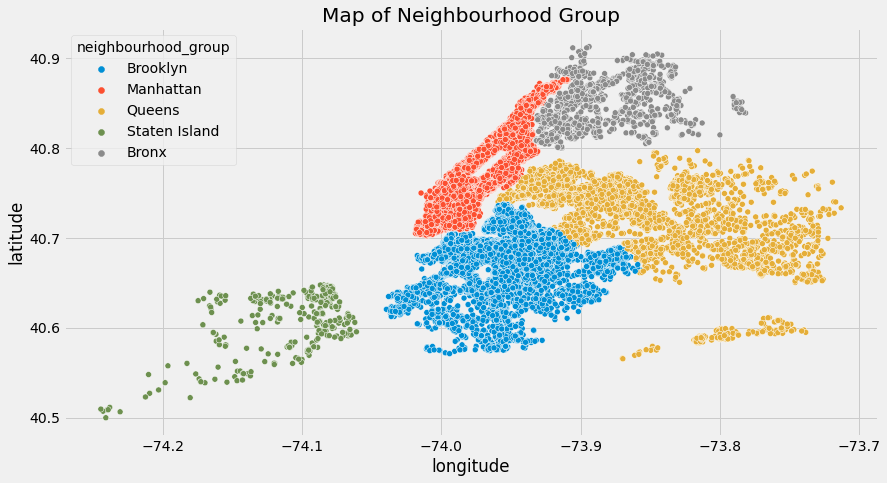

In [13]:
#Map of neighbourhood group
plt.figure(figsize=(13,7))
plt.title("Map of Neighbourhood Group")
sns.scatterplot(nyc_df.longitude,nyc_df.latitude,hue=nyc_df.neighbourhood_group)
plt.ioff()
plt.show()

## Room Details
Let’s see the type of room.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


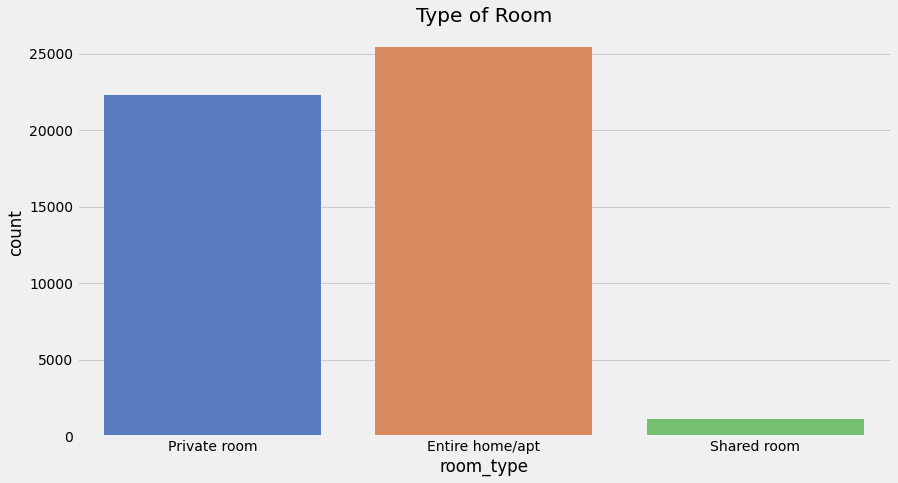

In [14]:
#Room type
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(nyc_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.

Let’s see room types occupied by a neighborhood group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


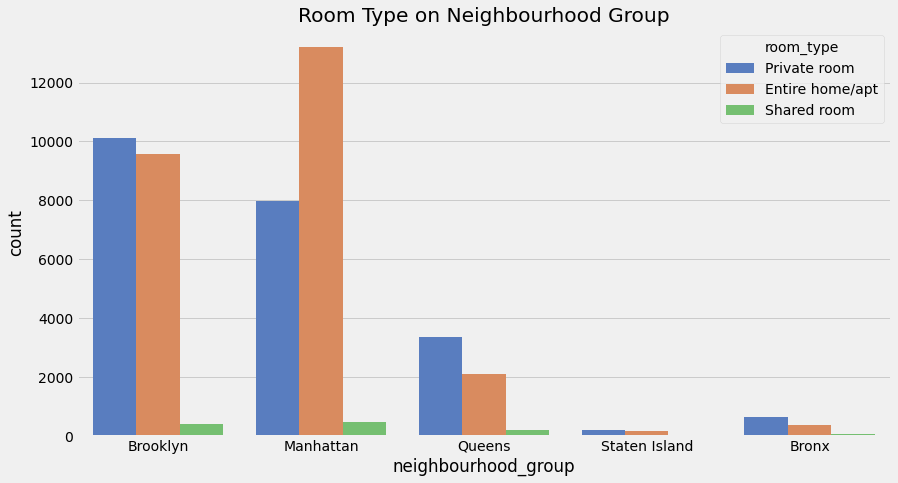

In [15]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(nyc_df.neighbourhood_group,hue=nyc_df.room_type, palette="muted")
plt.show()

The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

## Neighbourhood Group vs. Availability Room

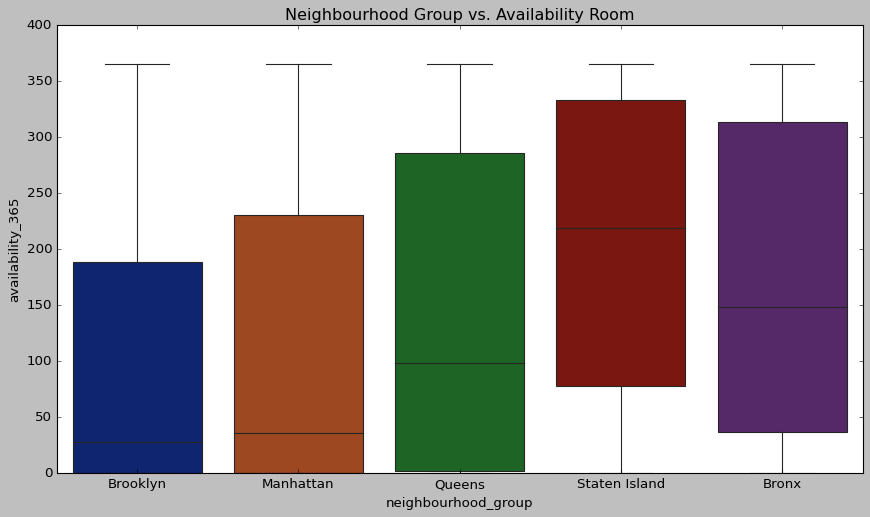

In [16]:
#Neighbourhood Group vs. Availability Room
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=nyc_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

The graph above shows the relationship between the availability room and neighborhood group.

## Neighbourhood Group Price Distribution

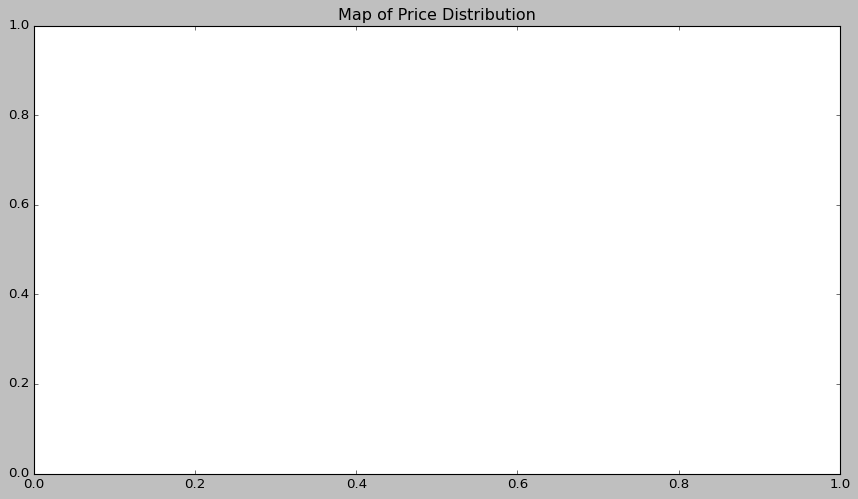

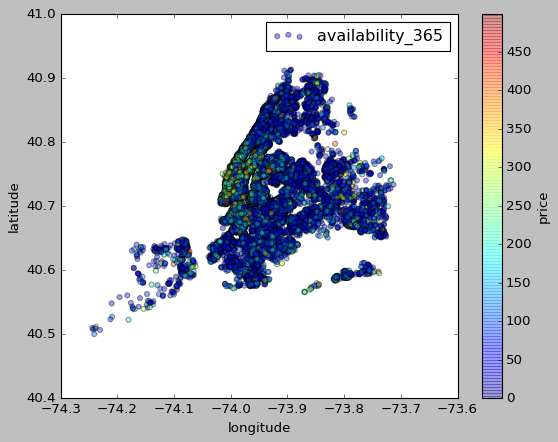

In [17]:
#Neighbourhood Group Price Distribution
#Price Varies vs. Area
plt.figure(figsize=(13,7))
plt.title("Map of Price Distribution")
ax=nyc_df[nyc_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
#plt.ioff()
plt.show()

The information we got from the graph above is red color dots are the rooms with a higher price. Also, we can see that the Manhattan region has a more expensive room price.

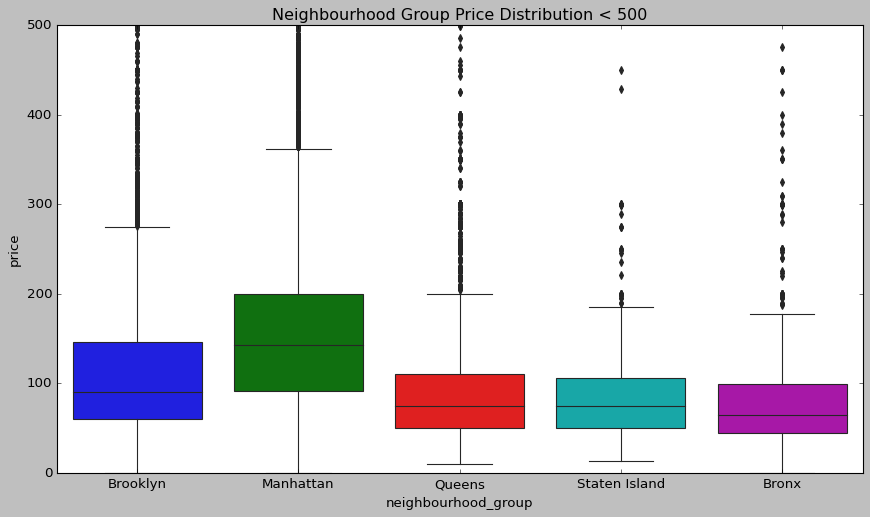

In [18]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = nyc_df[nyc_df.price<500])
plt.show()

From the boxplot above, we can definitely observe a couple of things about the distribution of prices for Airbnb in NYC.
We can state that Manhattan has the highest range price for the listings with about 140 USD as an average price, followed by Brooklyn with 90 USD per night,
Queens and Staten Island seem to have a very similar distribution,
The Bronx is the cheapest.

Let’s see the correlation between the columns.

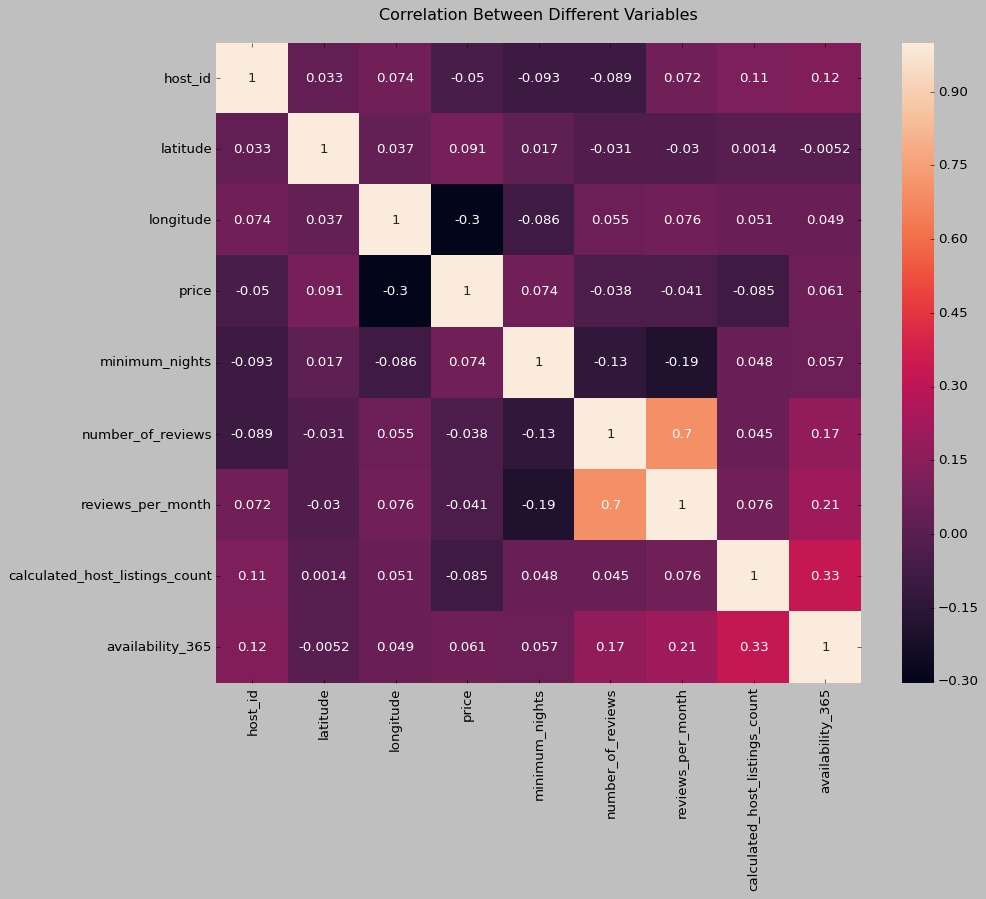

In [19]:
#correlation
corr = nyc_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

From the graph above, we know that there is not a strong correlation except review_per_month and number_of_review.

# Linear Regression
Now, let’s try to make a price prediction using the basic machine learning model from scikit learn. Scikit learn is a free software machine learning library for the Python programming language.

- Import library for machine learning

In [20]:
#prediction
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
nyc_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Then, encode label with a value between 0 and n_classes-1

In [22]:
#encode label with value between 0 and n_classes-1
encode = preprocessing.LabelEncoder()

#fit label encoder
encode.fit(nyc_df.neighbourhood_group)
nyc_df.neighbourhood_group=encode.transform(nyc_df.neighbourhood_group)

## Transform labels to normalized encoding

In [23]:
# Transform labels to normalized encoding
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.neighbourhood)
nyc_df.neighbourhood=encode.transform(nyc_df.neighbourhood)

In [24]:
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.room_type)
nyc_df.room_type=encode.transform(nyc_df.room_type)

nyc_df.sort_values(by='price',ascending=True,inplace=True)

nyc_df.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28
25795,86327101,1,13,40.68279,-73.91170,1,0,1,95,4.37,6,232
26841,101970559,1,28,40.69211,-73.90670,2,0,30,2,0.11,6,333
25778,10132166,1,214,40.70838,-73.94645,0,0,5,3,0.15,1,73
25794,86327101,1,13,40.68173,-73.91342,1,0,1,93,4.28,6,176
26866,101970559,1,28,40.69166,-73.90928,2,0,30,5,0.26,6,139


# Training model

In [25]:
# Train linear regression model

l_reg = LinearRegression()

X = nyc_df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = nyc_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

l_reg.fit(X_train,y_train)


LinearRegression()

In [26]:
#prediction

predicts = l_reg.predict(X_test)

print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))


Mean Squared Error:  180.73409656936232
R2 Score:  11.639576782323836
Mean Absolute Error:  72.8609136682529
Mean Squareroot Error:  32664.81366274359


Next, we want to know the difference between the actual price and the predicted price. Let’s begin with make a new data frame called lr_pred_df

In [27]:
#Actual Vs Predicted for Linear Regression
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': predicts.flatten()}).head(20)

print(lr_pred_df.head(5))

   actual_values  predicted_values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753


In [28]:
lr_pred_df.index

RangeIndex(start=0, stop=20, step=1)

Now visualize the result.

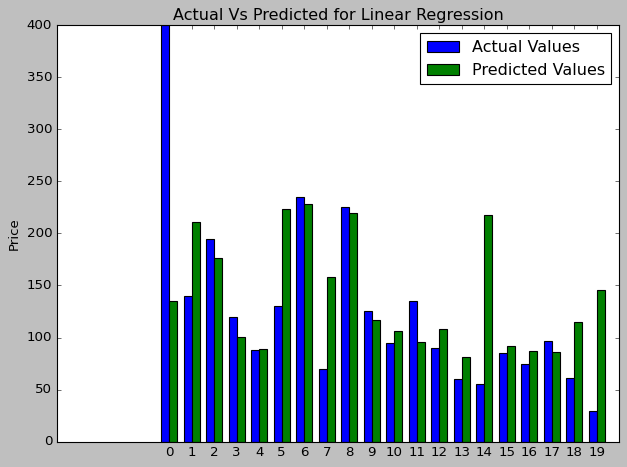

In [29]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

# Lasso regression

In [30]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [31]:
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [32]:
pred = clf.predict(X_test)

In [33]:
#prediction

print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R2 Score: ", r2_score(y_test,pred) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
print("Mean Squareroot Error: ", mean_squared_error(y_test,pred))

Mean Squared Error:  180.7552108557057
R2 Score:  11.618930138540751
Mean Absolute Error:  72.66599921152147
Mean Squareroot Error:  32672.446251490637


# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [35]:
predrf = regr.predict(X_test)
#prediction

print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predrf)))
print("R2 Score: ", r2_score(y_test,predrf) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predrf))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predrf))

Mean Squared Error:  181.31955851403754
R2 Score:  11.066187977294263
Mean Absolute Error:  70.25648970151197
Mean Squareroot Error:  32876.782299725484


# XGBoost Regressor

In [39]:
from xgboost import XGBRegressor
model = XGBRegressor()
model = XGBRegressor(n_estimators=100, max_depth=7)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

[22:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
# prediction

print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print("R2 Score: ", r2_score(y_test,yhat) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,yhat))
print("Mean Squareroot Error: ", mean_squared_error(y_test,yhat))

Mean Squared Error:  174.38255238905967
R2 Score:  17.74095517052301
Mean Absolute Error:  60.849011052226544
Mean Squareroot Error:  30409.27457772314


In [41]:
#Actual Vs Predicted for Linear Regression
xg_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values':yhat.flatten()}).head(20)

print(xg_pred_df.head(5))

   actual_values  predicted_values
0            400        121.804787
1            140        147.731445
2            195        151.681610
3            120         76.720413
4             88         71.626862


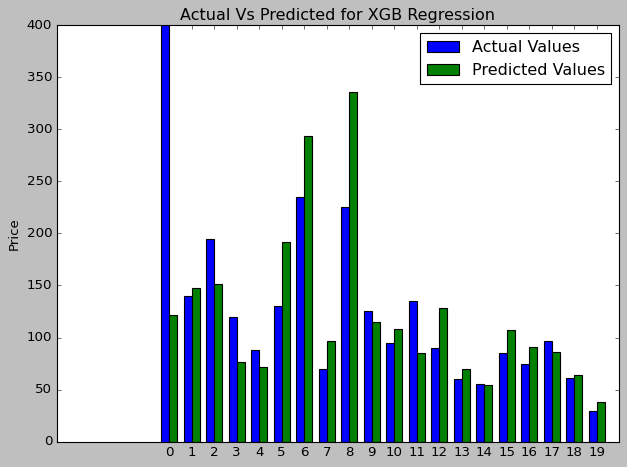

In [42]:
x = xg_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xg_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, xg_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for XGB Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show();

# Result Summary:
After trying few models best result we have found for XGBoost regressor.

# Conclusion :
Its a amazing dataset to work on EDA and machine learning because airbnb dataset has lot of features to explain, visualize univariate, bivariate, multivariate, histogram, correlation plot. Dataset contains both categorical and numerical features. In this project I used few features for EDA purpose and also for machine learning. Its lot to do further.
Recommendations:
- Use More features for EDA and different statistical description as well.
- Feature engineering on categorical and numerical data, standarization, normalization, encoding.
- Use more ML model and hyperparameter tuning.
- Use deep learning model to get more better result. 
 
